In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc
from sklearn.metrics import fbeta_score, average_precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import importlib
from wordcloud import WordCloud
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, fbeta_score, precision_score, recall_score, average_precision_score
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
import shap
import shap.maskers as maskers
import plots

In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

## 3. Preprocesamiento de datos estructurados

En esta sección se realizara el preprocesamiento de los datos
estructurados

In [3]:
df_listings = pd.read_csv('data/listings.csv')

In [4]:
print(df_listings.columns.to_list())

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

In [5]:
cols_listings = ['id', 'name', 
        "host_is_superhost", "host_response_time", "host_response_rate", 
        "host_acceptance_rate", "host_since",
        "neighbourhood_cleansed","room_type", "property_type", 
        "accommodates", "bathrooms", "bedrooms",
        "beds", "price", "minimum_nights", "reviews_per_month", 
        "availability_365", "instant_bookable", "review_scores_rating"]

In [6]:
df_listings = df_listings[cols_listings]

In [7]:
df_listings.head(4)

,id,name,host_is_superhost,host_response_time,host_response_rate,host_acceptance_rate,host_since,neighbourhood_cleansed,room_type,property_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,reviews_per_month,availability_365,instant_bookable,review_scores_rating
0,35797,Villa Dante,f,NaN,NaN,NaN,2010-06-28,Cuajimalpa de Morelos,Entire home/apt,Entire villa,2,1.0,1.0,1.0,"$3,982.00",1,NaN,363,f,NaN
1,44616,Condesa Haus,f,within a few hours,100%,90%,2010-08-09,Cuauhtémoc,Entire home/apt,Entire home,14,NaN,5.0,NaN,NaN,1,0.40,364,f,4.59
2,56074,Great space in historical San Rafael,f,within a day,88%,100%,2010-10-19,Cuauhtémoc,Entire home/apt,Entire condo,2,1.0,1.0,1.0,$585.00,15,0.49,361,f,4.87
3,67703,"2 bedroom apt. deco bldg, Condesa",t,within an hour,100%,47%,2011-01-04,Cuauhtémoc,Entire home/apt,Entire rental unit,4,NaN,2.0,NaN,NaN,2,0.31,307,f,4.90


In [8]:
df_processed_list = df_listings.copy()

- Transformaremos los datos booleanos a enteros
- Eliminaremos el signo de porciento y pasamos los valores a decimales
- Eliminaremos el signo de dolar

In [9]:
bool_cols = ["host_is_superhost", "instant_bookable"]

In [10]:
print("Tipos de datos:")
print("host_is_superhost:", df_processed_list["host_is_superhost"].dtype)
print("instant_bookable:", df_processed_list["instant_bookable"].dtype)

print("\nValores únicos en host_is_superhost:")
print(df_processed_list["host_is_superhost"].unique())
print("Valores únicos en instant_bookable:")
print(df_processed_list["instant_bookable"].unique())

Tipos de datos:
host_is_superhost: object
instant_bookable: object

Valores únicos en host_is_superhost:
['f' 't' nan]
Valores únicos en instant_bookable:
['f' 't']


In [11]:
df_processed_list["host_is_superhost"] = df_processed_list["host_is_superhost"].map({'t':1, 'f':0})
df_processed_list["instant_bookable"] = df_processed_list["instant_bookable"].map({'t':1, 'f':0})

In [12]:
print("Tipos de datos:")
print("host_is_superhost:", df_processed_list["host_is_superhost"].dtype)
print("instant_bookable:", df_processed_list["instant_bookable"].dtype)

print("\nValores únicos en host_is_superhost:")
print(df_processed_list["host_is_superhost"].unique())
print("Valores únicos en instant_bookable:")
print(df_processed_list["instant_bookable"].unique())

Tipos de datos:
host_is_superhost: float64
instant_bookable: int64

Valores únicos en host_is_superhost:
[ 0.  1. nan]
Valores únicos en instant_bookable:
[0 1]


In [13]:
moda_superhost = mode_value = df_processed_list['host_is_superhost'].mode()[0]
print("moda_superhost: ", moda_superhost)
df_processed_list['host_is_superhost'] = df_processed_list['host_is_superhost'].fillna(mode_value).astype(int)

moda_superhost:  0.0


In [14]:
print("Datos faltantes:")
print("host_is_superhost:", df_processed_list["host_is_superhost"].isnull().sum())
print("instant_bookable:", df_processed_list["instant_bookable"].isnull().sum())

Datos faltantes:
host_is_superhost: 0
instant_bookable: 0


In [15]:
df_processed_list["host_response_rate"] = df_listings["host_response_rate"].str.rstrip("%").astype(float) / 100
df_processed_list["host_acceptance_rate"] = df_listings["host_acceptance_rate"].str.rstrip("%").astype(float) / 100

In [16]:
df_processed_list["price"] = df_listings["price"].str.replace(r"[$,]", "", regex=True).astype(float)

- Transformamos la fecha en que inicio el host a formato de fecha
- Calculamos la cantidad de dias que el host ha estado activo en la plataforma

In [17]:
df_processed_list["host_since"] = pd.to_datetime(df_listings["host_since"])
df_processed_list["host_days"] = (pd.Timestamp.today() - df_processed_list["host_since"]).dt.days

- Imputaremos los datos faltantes de las columnas numericas con la mediana para que los valores imputados sean representativos de la distribucion de los datos
- Los datos faltantes de las columnas categoricas seran imputados con `Unknown`

In [18]:
num_cols = ["host_response_rate","host_acceptance_rate",
            "accommodates","bathrooms","bedrooms",
            "beds","price", "minimum_nights","reviews_per_month",
            "availability_365","host_days"]

In [19]:
faltantes = df_processed_list[num_cols].isnull().sum()
porcentaje = (faltantes / len(df_processed_list)) * 100

print("Resumen de datos faltantes:")
print("-" * 50)
for col in num_cols:
    print(f"{col}: {faltantes[col]} datos faltantes ({porcentaje[col]:.2f}%)")

Resumen de datos faltantes:
--------------------------------------------------
host_response_rate: 3504 datos faltantes (13.44%)
host_acceptance_rate: 2739 datos faltantes (10.51%)
accommodates: 0 datos faltantes (0.00%)
bathrooms: 4005 datos faltantes (15.36%)
bedrooms: 971 datos faltantes (3.73%)
beds: 4022 datos faltantes (15.43%)
price: 3999 datos faltantes (15.34%)
minimum_nights: 0 datos faltantes (0.00%)
reviews_per_month: 3261 datos faltantes (12.51%)
availability_365: 0 datos faltantes (0.00%)
host_days: 5 datos faltantes (0.02%)


In [20]:
df_processed_list[num_cols] = df_processed_list[num_cols].fillna(df_processed_list[num_cols].median())

In [21]:
cat_cols = ["host_response_time","neighbourhood_cleansed",
            "room_type","property_type"]

In [22]:
faltantes = df_processed_list[cat_cols].isnull().sum()
porcentaje = (faltantes / len(df_processed_list)) * 100

print("Resumen de datos faltantes:")
print("-" * 50)
for col in cat_cols:
    print(f"{col}: {faltantes[col]} datos faltantes ({porcentaje[col]:.2f}%)")

Resumen de datos faltantes:
--------------------------------------------------
host_response_time: 3504 datos faltantes (13.44%)
neighbourhood_cleansed: 0 datos faltantes (0.00%)
room_type: 0 datos faltantes (0.00%)
property_type: 0 datos faltantes (0.00%)


In [23]:
df_processed_list[cat_cols] = df_processed_list[cat_cols].fillna("Unknown")

In [24]:
for col in cat_cols:
    num_unicos = df_processed_list[col].nunique()
    print(f'{col}: {num_unicos} valores únicos')

host_response_time: 5 valores únicos
neighbourhood_cleansed: 16 valores únicos
room_type: 4 valores únicos
property_type: 82 valores únicos


Para evitar que se creen demasiadas categorías al utilizar OneHotEncoder se tomarán los primeros valores de las columnas categóricas y el resto se agrupará en una categoría llamada `Other`.

In [25]:
# Mantener top 5 barrios y agrupar resto en 'Other'
top5 = df_listings['neighbourhood_cleansed'].value_counts().nlargest(5).index
df_processed_list['neighbourhood_top'] = df_listings['neighbourhood_cleansed'].where(
    df_listings['neighbourhood_cleansed'].isin(top5), 'Other'
)
print(df_processed_list['neighbourhood_top'].value_counts())

neighbourhood_top
Cuauhtémoc        12030
Miguel Hidalgo     4441
Other              3907
Benito Juárez      2989
Coyoacán           1693
Álvaro Obregón     1007
Name: count, dtype: int64


In [26]:
top_pt = df_listings['property_type'].value_counts().nlargest(10).index
df_processed_list['property_type_top'] = df_listings['property_type'].where(
    df_listings['property_type'].isin(top_pt), 'Other'
)
print(df_processed_list['property_type_top'].value_counts())

property_type_top
Entire rental unit             10024
Entire condo                    3270
Private room in rental unit     2994
Other                           2684
Private room in home            2270
Entire loft                     1497
Entire home                      813
Entire serviced apartment        795
Private room in condo            781
Room in hotel                    530
Private room in guesthouse       409
Name: count, dtype: int64


- Aplicamos el One-Hot encoding
- Agregamos las variables codificadas al dataset y eliminamos las originales
- Aplicamos el StandardScaler a las variables numéricas

In [27]:
# One-hot encoding
cols_to_encode = ['neighbourhood_top', 'room_type', 'property_type_top', 'host_response_time']
df_ohe = pd.get_dummies(df_processed_list[cols_to_encode], drop_first=True, prefix=cols_to_encode)

In [28]:
# Concatena el dataset procesado con el dataset del encoder, luego elimina las columnas originales
df_encoded_list = pd.concat([df_processed_list, df_ohe], axis=1).drop(
    ['neighbourhood_cleansed','neighbourhood_top',
     'room_type','property_type','property_type_top', 'host_response_time'],
    axis=1
)

In [29]:
print(df_encoded_list.columns.to_list())

['id', 'name', 'host_is_superhost', 'host_response_rate', 'host_acceptance_rate', 'host_since', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'reviews_per_month', 'availability_365', 'instant_bookable', 'review_scores_rating', 'host_days', 'neighbourhood_top_Coyoacán', 'neighbourhood_top_Cuauhtémoc', 'neighbourhood_top_Miguel Hidalgo', 'neighbourhood_top_Other', 'neighbourhood_top_Álvaro Obregón', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'property_type_top_Entire home', 'property_type_top_Entire loft', 'property_type_top_Entire rental unit', 'property_type_top_Entire serviced apartment', 'property_type_top_Other', 'property_type_top_Private room in condo', 'property_type_top_Private room in guesthouse', 'property_type_top_Private room in home', 'property_type_top_Private room in rental unit', 'property_type_top_Room in hotel', 'host_response_time_a few days or more', 'host_response_time_within a day', 'host_response_time_w

In [30]:
num_cols = [
    "host_response_rate", "host_acceptance_rate", "host_days", 
    "accommodates", "bathrooms", "bedrooms", "beds", "price", 
    "minimum_nights", "reviews_per_month",
    "availability_365"
]

# Instanciar y aplicar scaler
scaler = StandardScaler()
df_encoded_list[num_cols] = scaler.fit_transform(df_encoded_list[num_cols])

Luego de aplicar el scaler verificamos que:
- `mean` tenga un valor igual o cerca de 0.00
- `std` tenga un valor igual o cercano a 1
- `count` es el mismo numero para todas las columnas

In [31]:
df_encoded_list[num_cols].describe().round(2)

,host_response_rate,host_acceptance_rate,host_days,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,reviews_per_month,availability_365
count,26067.00,26067.00,26067.00,26067.00,26067.00,26067.00,26067.00,26067.00,26067.00,26067.00,26067.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-5.07,-3.82,-1.99,-0.99,-1.44,-1.20,-1.10,-0.36,-0.15,-0.90,-1.68
25%,0.28,0.26,-0.83,-0.57,-0.40,-0.43,-0.49,-0.22,-0.15,-0.62,-1.00
50%,0.28,0.39,0.16,-0.57,-0.40,-0.43,-0.49,-0.13,-0.11,-0.26,0.31
75%,0.28,0.43,0.74,0.28,0.12,0.35,0.11,-0.00,-0.11,0.31,0.96
max,0.28,0.43,2.81,5.36,49.51,37.71,29.20,109.06,44.65,31.04,1.13


In [32]:
df_encoded_list.to_parquet(
    "data/processed_listings.parquet", 
    engine='pyarrow', 
    compression='snappy',
    index=False)

print(df_encoded_list.columns.to_list())

['id', 'name', 'host_is_superhost', 'host_response_rate', 'host_acceptance_rate', 'host_since', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'reviews_per_month', 'availability_365', 'instant_bookable', 'review_scores_rating', 'host_days', 'neighbourhood_top_Coyoacán', 'neighbourhood_top_Cuauhtémoc', 'neighbourhood_top_Miguel Hidalgo', 'neighbourhood_top_Other', 'neighbourhood_top_Álvaro Obregón', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'property_type_top_Entire home', 'property_type_top_Entire loft', 'property_type_top_Entire rental unit', 'property_type_top_Entire serviced apartment', 'property_type_top_Other', 'property_type_top_Private room in condo', 'property_type_top_Private room in guesthouse', 'property_type_top_Private room in home', 'property_type_top_Private room in rental unit', 'property_type_top_Room in hotel', 'host_response_time_a few days or more', 'host_response_time_within a day', 'host_response_time_w

## 4. Integración de texto y datos estructurados
En este apartado se integraran los datos estructurados con los datos de texto
para crear un conjunto de datos mas completo y enriquecido.


In [33]:
df_encoded_list.tail(3)

,id,name,host_is_superhost,host_response_rate,host_acceptance_rate,host_since,accommodates,bathrooms,bedrooms,beds,...,property_type_top_Other,property_type_top_Private room in condo,property_type_top_Private room in guesthouse,property_type_top_Private room in home,property_type_top_Private room in rental unit,property_type_top_Room in hotel,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
26064,1379781424660291699,Cozy room in Roma Norte,1,0.283704,-0.210056,2015-05-31,-0.994815,-0.397261,-0.425707,-0.491924,...,False,False,False,False,True,False,False,False,False,True
26065,1379807014531191212,Stylish suite w private terrace close to Polanco,1,0.283704,0.427658,2023-05-16,-0.570905,-0.397261,-0.425707,-0.491924,...,False,False,False,False,False,False,False,False,False,True
26066,1379814270520534429,Depto. en el corazón de Roma N,0,0.283704,0.385143,2018-05-12,1.124735,0.642490,0.352641,0.114077,...,False,False,False,False,False,False,False,False,False,False


In [34]:
cols = ['listing_id', 'review_scores_rating', 'processed_comments', 'target']
df_reviews = pd.read_parquet(
    "data/processed_comments.parquet",
    engine='pyarrow',
    columns=cols
)

In [35]:
print(df_encoded_list.columns.tolist())
print(df_reviews.columns.tolist())

['id', 'name', 'host_is_superhost', 'host_response_rate', 'host_acceptance_rate', 'host_since', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'reviews_per_month', 'availability_365', 'instant_bookable', 'review_scores_rating', 'host_days', 'neighbourhood_top_Coyoacán', 'neighbourhood_top_Cuauhtémoc', 'neighbourhood_top_Miguel Hidalgo', 'neighbourhood_top_Other', 'neighbourhood_top_Álvaro Obregón', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'property_type_top_Entire home', 'property_type_top_Entire loft', 'property_type_top_Entire rental unit', 'property_type_top_Entire serviced apartment', 'property_type_top_Other', 'property_type_top_Private room in condo', 'property_type_top_Private room in guesthouse', 'property_type_top_Private room in home', 'property_type_top_Private room in rental unit', 'property_type_top_Room in hotel', 'host_response_time_a few days or more', 'host_response_time_within a day', 'host_response_time_w

In [36]:
print(df_encoded_list.shape)
print(df_reviews.shape)

(26067, 39)
(12129, 4)


In [37]:
df_full = pd.merge(
    df_encoded_list,
    df_reviews,
    left_on='id',
    right_on='listing_id',
    how='inner'
)

In [38]:
df_full.shape

(12129, 43)

In [39]:
print(df_full["target"].value_counts())

target
1    11709
0      420
Name: count, dtype: int64


In [40]:
print(df_full.shape)
print(df_full.columns)

(12129, 43)
Index(['id', 'name', 'host_is_superhost', 'host_response_rate',
       'host_acceptance_rate', 'host_since', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'reviews_per_month',
       'availability_365', 'instant_bookable', 'review_scores_rating_x',
       'host_days', 'neighbourhood_top_Coyoacán',
       'neighbourhood_top_Cuauhtémoc', 'neighbourhood_top_Miguel Hidalgo',
       'neighbourhood_top_Other', 'neighbourhood_top_Álvaro Obregón',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'property_type_top_Entire home',
       'property_type_top_Entire loft', 'property_type_top_Entire rental unit',
       'property_type_top_Entire serviced apartment',
       'property_type_top_Other', 'property_type_top_Private room in condo',
       'property_type_top_Private room in guesthouse',
       'property_type_top_Private room in home',
       'property_type_top_Private room in rental unit',
       'proper

In [41]:
to_drop = [
    "id",
    "listing_id", 
    "target",
    "name"
]

X = df_full.drop(columns=to_drop)

y = df_full["target"]

In [42]:
print("Shape X:", X.shape)
print("Columns X:", X.columns.tolist())
print("Shape y:", y.shape)
print("Valores únicos en y:", np.bincount(y))

Shape X: (12129, 39)
Columns X: ['host_is_superhost', 'host_response_rate', 'host_acceptance_rate', 'host_since', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'reviews_per_month', 'availability_365', 'instant_bookable', 'review_scores_rating_x', 'host_days', 'neighbourhood_top_Coyoacán', 'neighbourhood_top_Cuauhtémoc', 'neighbourhood_top_Miguel Hidalgo', 'neighbourhood_top_Other', 'neighbourhood_top_Álvaro Obregón', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'property_type_top_Entire home', 'property_type_top_Entire loft', 'property_type_top_Entire rental unit', 'property_type_top_Entire serviced apartment', 'property_type_top_Other', 'property_type_top_Private room in condo', 'property_type_top_Private room in guesthouse', 'property_type_top_Private room in home', 'property_type_top_Private room in rental unit', 'property_type_top_Room in hotel', 'host_response_time_a few days or more', 'host_response_time_within a day', '

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

rus = RandomUnderSampler(sampling_strategy=0.2, random_state=42)  # 1 negativo : 5 positivos
X_res_test, y_res_test = rus.fit_resample(X_train, y_train)

Prueba del undersampling, no se usará este mismo para evitar data leakage.

In [44]:
print("Distribución luego de under-sampling:", y_res_test.value_counts())

Distribución luego de under-sampling: target
1    1680
0     336
Name: count, dtype: int64


In [45]:
numeric_features = num_cols + bool_cols + list(df_ohe.columns)
numeric_transformer = 'passthrough'

In [46]:
text_features = "processed_comments"
text_transformer = TfidfVectorizer(
    max_features=2000,
    ngram_range=(1,2),
    stop_words=None,
    norm='l2'
)

In [47]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, text_features),
        ('num',  numeric_transformer, numeric_features),
    ],
    remainder='drop'
)

## 5. Modelado Predictivo

In [48]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'precision_pos': make_scorer(precision_score, pos_label=1),
    'F0.5': make_scorer(fbeta_score, beta=0.5, pos_label=1),
    'specificity': make_scorer(recall_score, pos_label=0),
    'accuracy': 'accuracy'
}

In [49]:
pipe_lr = Pipeline([
    ('pre', preprocessor),
    ('undersampler', RandomUnderSampler(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000, solver='liblinear'))
])

param_grid_lr = {
    'undersampler__sampling_strategy': [0.1, 0.2, 0.3],
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__class_weight': ['balanced'],
    'clf__penalty': ['l1', 'l2']
}

gs_lr = GridSearchCV(
    estimator=pipe_lr,
    param_grid=param_grid_lr,
    scoring=scoring,
    refit='F0.5',
    cv=cv,
    n_jobs=2,
    verbose=1
)

gs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('text',
                                                                         TfidfVectorizer(max_features=2000,
                                                                                         ngram_range=(1,
                                                                                                      2)),
                                                                         'processed_comments'),
                                                                        ('num',
                                                                         'passthrough',
                                                                         ['host_response_rate',
                                                                          'host_acceptance_rate',
                                                                          'host_days',
                                                                          'accommodates',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'beds',
                                                                          'price...
                         'clf__penalty': ['l1', 'l2'],
                         'undersampler__sampling_strategy': [0.1, 0.2, 0.3]},
             refit='F0.5',
             scoring={'F0.5': make_scorer(fbeta_score, response_method='predict', beta=0.5, pos_label=1),
                      'accuracy': 'accuracy',
                      'precision_pos': make_scorer(precision_score, response_method='predict', pos_label=1),
                      'specificity': make_scorer(recall_score, response_method='predict', pos_label=0)},
             verbose=1)

In [50]:
pipe_svc = Pipeline([
    ('pre', preprocessor),
    ('undersampler', RandomUnderSampler(sampling_strategy=0.2, random_state=42)),
    ('clf', SVC(probability=True))
])

param_grid_svc = {
    'undersampler__sampling_strategy': [0.1, 0.2, 0.3],
    'clf__kernel': ['linear'],
    'clf__C': [0.1, 1, 10],
    'clf__class_weight': ['balanced']
}

gs_svc = GridSearchCV(
    estimator=pipe_svc,
    param_grid=param_grid_svc,
    scoring=scoring,
    refit='F0.5',
    cv=cv,
    n_jobs=2,
    verbose=1
)
gs_svc.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('text',
                                                                         TfidfVectorizer(max_features=2000,
                                                                                         ngram_range=(1,
                                                                                                      2)),
                                                                         'processed_comments'),
                                                                        ('num',
                                                                         'passthrough',
                                                                         ['host_response_rate',
                                                                          'host_acceptance_rate',
                                                                          'host_days',
                                                                          'accommodates',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'beds',
                                                                          'price...
                         'clf__kernel': ['linear'],
                         'undersampler__sampling_strategy': [0.1, 0.2, 0.3]},
             refit='F0.5',
             scoring={'F0.5': make_scorer(fbeta_score, response_method='predict', beta=0.5, pos_label=1),
                      'accuracy': 'accuracy',
                      'precision_pos': make_scorer(precision_score, response_method='predict', pos_label=1),
                      'specificity': make_scorer(recall_score, response_method='predict', pos_label=0)},
             verbose=1)

## 6. Evaluación del modelo y visualización de resultados

#### Logistic Regression

In [51]:
print("\n" + "="*60)
print("Logistic Regression")
print("="*60)
print("Mejores parámetros:\n", gs_lr.best_params_)

best_lr = gs_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)
probs_lr = best_lr.predict_proba(X_test)[:,1]

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_lr)
print("\nMatriz de Confusión:")
print(f"{'':<15} {'Predicho Malo':<15} {'Predicho Bueno':<15}")
print(f"{'Real Malo':<15} {cm[0,0]:<15} {cm[0,1]:<15}")
print(f"{'Real Bueno':<15} {cm[1,0]:<15} {cm[1,1]:<15}")
print()

# Classification report
print(classification_report(y_test, y_pred_lr, target_names=['Malo','Bueno']))

# AUC-ROC y AUC-PR
roc_auc = roc_auc_score(y_test, probs_lr)
ap = average_precision_score(y_test, probs_lr)
print(f"AUC-ROC: {roc_auc:.3f}, AUC-PR: {ap:.3f}")



Logistic Regression
Mejores parámetros:
 {'clf__C': 10, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2', 'undersampler__sampling_strategy': 0.1}

Matriz de Confusión:
                Predicho Malo   Predicho Bueno 
Real Malo       70              14             
Real Bueno      124             2218           

              precision    recall  f1-score   support

        Malo       0.36      0.83      0.50        84
       Bueno       0.99      0.95      0.97      2342

    accuracy                           0.94      2426
   macro avg       0.68      0.89      0.74      2426
weighted avg       0.97      0.94      0.95      2426

AUC-ROC: 0.970, AUC-PR: 0.999


In [52]:
# Umbrales a probar
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

for thresh in thresholds:
    # Aplicar umbral para obtener predicciones
    y_pred_adj = (probs_lr >= thresh).astype(int)
    
    # Calcular matriz de confusión
    cm = confusion_matrix(y_test, y_pred_adj)
    
    # Imprimir resultados
    print("\n" + "="*60)
    print(f"Umbral: {thresh}")
    print("-"*60)
    
    # Imprimir matriz de confusión con etiquetas
    print("Matriz de Confusión:")
    print(f"{'':<15} {'Predicho Malo':<15} {'Predicho Bueno':<15}")
    print(f"{'Real Malo':<15} {cm[0,0]:<15} {cm[0,1]:<15}")
    print(f"{'Real Bueno':<15} {cm[1,0]:<15} {cm[1,1]:<15}")
    print()
    
    # Imprimir reporte de clasificación
    print("Reporte de Clasificación:")
    print(classification_report(y_test, y_pred_adj, target_names=['Malo','Bueno']))
    print("="*60)


Umbral: 0.2
------------------------------------------------------------
Matriz de Confusión:
                Predicho Malo   Predicho Bueno 
Real Malo       63              21             
Real Bueno      61              2281           

Reporte de Clasificación:
              precision    recall  f1-score   support

        Malo       0.51      0.75      0.61        84
       Bueno       0.99      0.97      0.98      2342

    accuracy                           0.97      2426
   macro avg       0.75      0.86      0.79      2426
weighted avg       0.97      0.97      0.97      2426


Umbral: 0.3
------------------------------------------------------------
Matriz de Confusión:
                Predicho Malo   Predicho Bueno 
Real Malo       66              18             
Real Bueno      79              2263           

Reporte de Clasificación:
              precision    recall  f1-score   support

        Malo       0.46      0.79      0.58        84
       Bueno       0.99      0.9

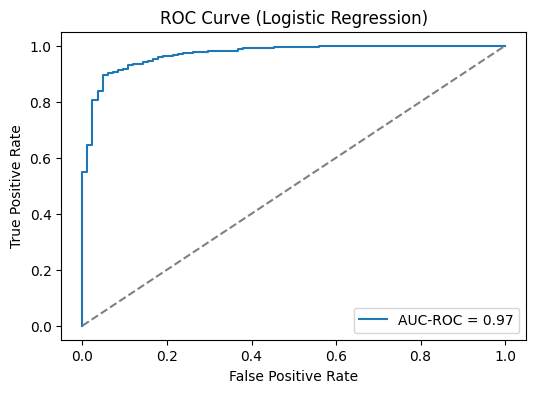

In [53]:
# 5) Curva ROC + AUC-ROC
fpr, tpr, _ = roc_curve(y_test, probs_lr)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC-ROC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Logistic Regression)")
plt.legend()
plt.show()



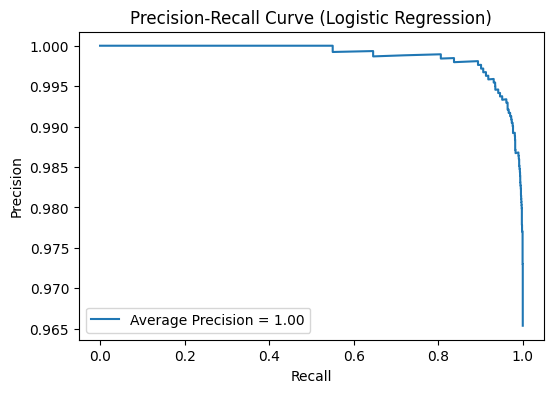

In [67]:
# 6) Curva Precision-Recall + AUC-PR
precision, recall, _ = precision_recall_curve(y_test, probs_lr)
ap = average_precision_score(y_test, probs_lr)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f"Average Precision = {ap:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Logistic Regression)")
plt.legend()
plt.show()

In [55]:
# 1) Accede al preprocesador
pre = gs_lr.best_estimator_.named_steps['pre']

# 2) Extrae el vectorizador de texto (clave 'text')
tfidf = pre.named_transformers_['text']
text_feats = tfidf.get_feature_names_out()

# 3) Extrae la lista de columnas numéricas (passthrough bajo 'num')
numeric_feats = pre.transformers_[1][2]

# 4) Construye la lista de nombres en el mismo orden que se concatenan
feat_names = list(text_feats) + numeric_feats

# 5) Obtén los coeficientes del clasificador
coefs = gs_lr.best_estimator_.named_steps['clf'].coef_[0]

# 6) Muestra el top 10 positivos y negativos

top_pos = np.argsort(coefs)[-10:]
top_neg = np.argsort(coefs)[:10]

print("Top 10 tokens/features que predicen 'Bueno' en Logistic Regression:")
for i in top_pos[::-1]:
    print(f"  {feat_names[i]} (coef = {coefs[i]:.3f})")

print("\nTop 10 tokens/features que predicen 'Malo' en Logistic Regression:")
for i in top_neg:
    print(f"  {feat_names[i]} (coef = {coefs[i]:.3f})")


Top 10 tokens/features que predicen 'Bueno' en Logistic Regression:
  home (coef = 5.410)
  host_is_superhost (coef = 5.030)
  excellent (coef = 4.285)
  walkable (coef = 3.962)
  awesome (coef = 3.754)
  beautiful (coef = 3.722)
  jacuzzi (coef = 3.694)
  perfect (coef = 3.599)
  square (coef = 3.591)
  quiet (coef = 3.586)

Top 10 tokens/features que predicen 'Malo' en Logistic Regression:
  not (coef = -7.348)
  accommodation (coef = -6.464)
  old (coef = -6.138)
  cancel (coef = -5.032)
  bad (coef = -4.739)
  balcony (coef = -4.272)
  wifi (coef = -4.208)
  locate (coef = -4.078)
  try (coef = -3.966)
  need (coef = -3.712)


In [56]:
text_coefs = coefs[:len(text_feats)]

# Índices de las palabras con mayores coeficientes positivos (predicen 'Bueno')
top_pos_indices = np.argsort(text_coefs)[-25:] 

# Índices de las palabras con menores coeficientes (predicen 'Malo')
top_neg_indices = np.argsort(text_coefs)[:25]

# Diccionarios de palabras y sus coeficientes (usamos valores absolutos para el tamaño en el word cloud)
pos_words = {text_feats[i]: text_coefs[i] for i in top_pos_indices}
neg_words = {text_feats[i]: -text_coefs[i] for i in top_neg_indices} 

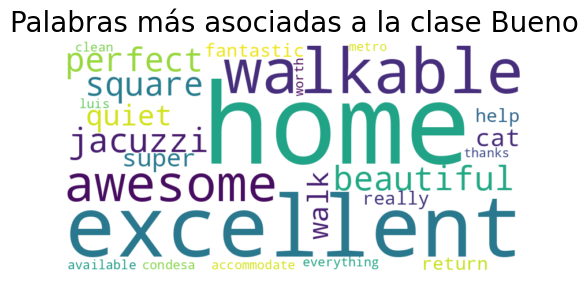

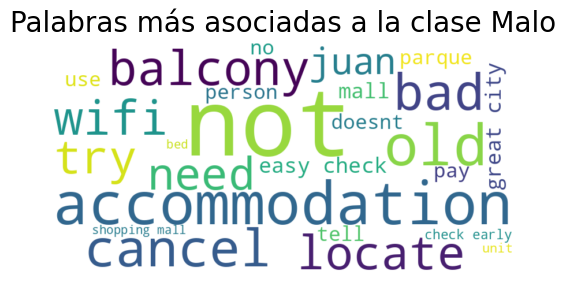

In [57]:
# Word Cloud para palabras asociadas a la clase positiva ('Bueno')
plots.plot_wordcloud_from_dictionary(pos_words, "Palabras más asociadas a la clase Bueno", max_words=50, width=800, height=400)

# Word Cloud para palabras asociadas a la clase negativa ('Malo')
plots.plot_wordcloud_from_dictionary(neg_words, "Palabras más asociadas a la clase Malo", max_words=50, width=800, height=400)

/home/tux/airbnb_comments/env/lib/python3.10/site-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


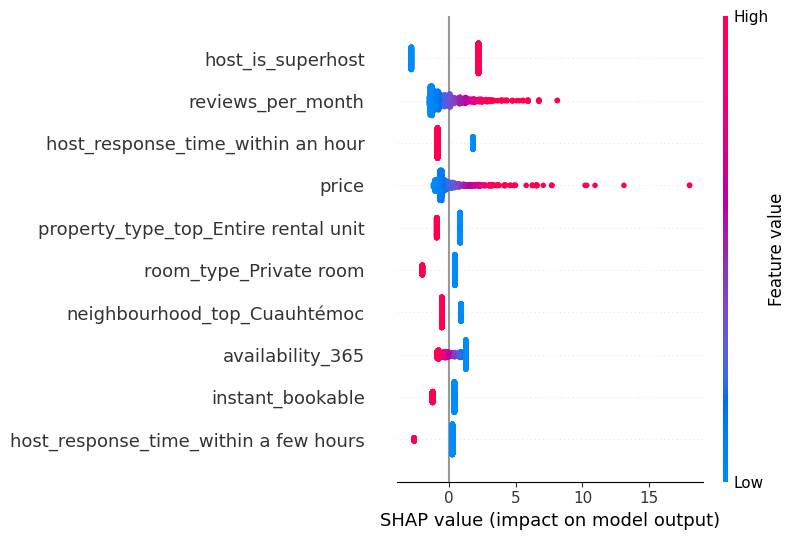

In [58]:
# 1) Entrena el mejor modelo de regresión logística
best_lr = gs_lr.best_estimator_
best_lr.fit(X_train, y_train)

# 2) Extrae el preprocesador y arma un pipeline que transforme X_test
pre = best_lr.named_steps['pre']
X_test_trans = pre.transform(X_test)  # matriz numpy o sparse

# 3) Instanciar el explainer
explainer = shap.LinearExplainer(
    best_lr.named_steps['clf'],        # el estimador lineal
    X_test_trans,                      # datos de referencia para el background
    feature_perturbation="interventional"
)

# 4) Calcula valores SHAP para una muestra de test
shap_values = explainer.shap_values(X_test_trans[:1000])  # e.g., primeras 1000 filas

# 5) Grafica un summary plot
feat_names = (best_lr
              .named_steps['pre']
              .named_transformers_['text']
              .get_feature_names_out().tolist()
             ) + numeric_feats

shap.summary_plot(
    shap_values, 
    X_test_trans[:1000].toarray() if hasattr(X_test_trans, "toarray") else X_test_trans,
    feature_names=feat_names,
    max_display=10
)


#### Support Vector Machine

In [59]:
print("\n" + "="*60)
print("Support Vector Machine")
print("="*60)
print("Mejores parámetros:\n", gs_svc.best_params_)

best_svc = gs_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test)
probs_svc = best_svc.predict_proba(X_test)[:,1]

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_svc)
print("\nMatriz de Confusión:")
print(f"{'':<15} {'Predicho Malo':<15} {'Predicho Bueno':<15}")
print(f"{'Real Malo':<15} {cm[0,0]:<15} {cm[0,1]:<15}")
print(f"{'Real Bueno':<15} {cm[1,0]:<15} {cm[1,1]:<15}")
print()

# Classification report
print(classification_report(y_test, y_pred_svc, target_names=['Malo','Bueno']))

# AUC-ROC y AUC-PR
roc_auc = roc_auc_score(y_test, probs_svc)
ap = average_precision_score(y_test, probs_svc)
print(f"AUC-ROC: {roc_auc:.3f}, AUC-PR: {ap:.3f}")


Support Vector Machine
Mejores parámetros:
 {'clf__C': 1, 'clf__class_weight': 'balanced', 'clf__kernel': 'linear', 'undersampler__sampling_strategy': 0.1}

Matriz de Confusión:
                Predicho Malo   Predicho Bueno 
Real Malo       68              16             
Real Bueno      139             2203           

              precision    recall  f1-score   support

        Malo       0.33      0.81      0.47        84
       Bueno       0.99      0.94      0.97      2342

    accuracy                           0.94      2426
   macro avg       0.66      0.88      0.72      2426
weighted avg       0.97      0.94      0.95      2426

AUC-ROC: 0.965, AUC-PR: 0.999


In [60]:
# Umbrales a probar
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

for thresh in thresholds:
    # Aplicar umbral para obtener predicciones
    y_pred_adj = (probs_svc >= thresh).astype(int)
    
    # Calcular matriz de confusión
    cm = confusion_matrix(y_test, y_pred_adj)
    
    # Imprimir resultados
    print("\n" + "="*60)
    print(f"Umbral: {thresh}")
    print("-"*60)
    
    # Imprimir matriz de confusión con etiquetas
    print("Matriz de Confusión:")
    print(f"{'':<15} {'Predicho Malo':<15} {'Predicho Bueno':<15}")
    print(f"{'Real Malo':<15} {cm[0,0]:<15} {cm[0,1]:<15}")
    print(f"{'Real Bueno':<15} {cm[1,0]:<15} {cm[1,1]:<15}")
    print()
    
    # Imprimir reporte de clasificación
    print("Reporte de Clasificación:")
    print(classification_report(y_test, y_pred_adj, target_names=['Malo','Bueno']))
    print("="*60)


Umbral: 0.2
------------------------------------------------------------
Matriz de Confusión:
                Predicho Malo   Predicho Bueno 
Real Malo       34              50             
Real Bueno      9               2333           

Reporte de Clasificación:
              precision    recall  f1-score   support

        Malo       0.79      0.40      0.54        84
       Bueno       0.98      1.00      0.99      2342

    accuracy                           0.98      2426
   macro avg       0.88      0.70      0.76      2426
weighted avg       0.97      0.98      0.97      2426


Umbral: 0.3
------------------------------------------------------------
Matriz de Confusión:
                Predicho Malo   Predicho Bueno 
Real Malo       44              40             
Real Bueno      20              2322           

Reporte de Clasificación:
              precision    recall  f1-score   support

        Malo       0.69      0.52      0.59        84
       Bueno       0.98      0.9

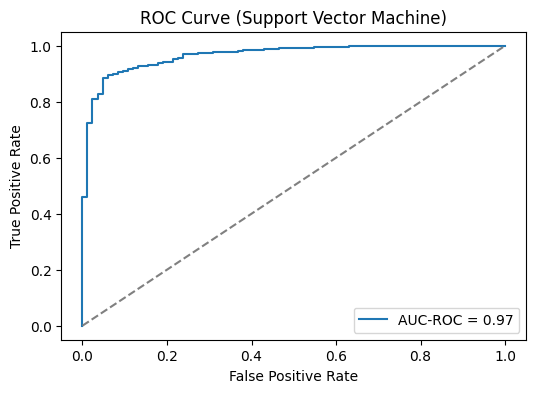

In [61]:
# 5) Curva ROC + AUC-ROC
fpr, tpr, _ = roc_curve(y_test, probs_svc)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC-ROC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Support Vector Machine)")
plt.legend()
plt.show()


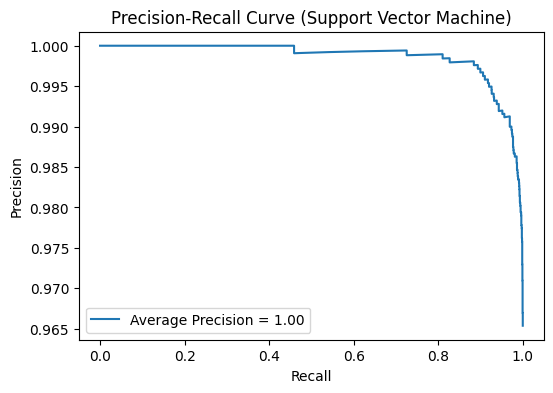

In [68]:
# 6) Curva Precision-Recall + AUC-PR
precision, recall, _ = precision_recall_curve(y_test, probs_svc)
ap = average_precision_score(y_test, probs_svc)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f"Average Precision = {ap:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Support Vector Machine)")
plt.legend()
plt.show()

In [63]:
# 1) Accede al preprocesador
pre = gs_svc.best_estimator_.named_steps['pre']

# 2) Extrae el vectorizador de texto (clave 'text')
tfidf = pre.named_transformers_['text']
text_feats = tfidf.get_feature_names_out()

# 3) Extrae la lista de columnas numéricas (passthrough bajo 'num')
numeric_feats = pre.transformers_[1][2]

# 4) Construye la lista de nombres en el mismo orden que se concatenan
feat_names = list(text_feats) + numeric_feats

# 5) Obtén los coeficientes del clasificador y conviértelos a una matriz densa
coefs = gs_svc.best_estimator_.named_steps['clf'].coef_.toarray()[0]

# 6) Muestra el top 10 positivos y negativos
top_pos = np.argsort(coefs)[-10:]
top_neg = np.argsort(coefs)[:10]

print("Top 10 tokens/features que predicen 'Bueno' en SVC:")
for i in top_pos[::-1]:
    print(f"  {feat_names[i]} (coef = {coefs[i]:.3f})")

print("\nTop 10 tokens/features que predicen 'Malo' en SVC:")
for i in top_neg:
    print(f"  {feat_names[i]} (coef = {coefs[i]:.3f})")

Top 10 tokens/features que predicen 'Bueno' en SVC:
  home (coef = 1.947)
  host_is_superhost (coef = 1.825)
  quiet (coef = 1.524)
  awesome (coef = 1.517)
  perfect (coef = 1.490)
  return (coef = 1.390)
  thanks (coef = 1.388)
  help (coef = 1.385)
  walk (coef = 1.323)
  first (coef = 1.280)

Top 10 tokens/features que predicen 'Malo' en SVC:
  not (coef = -2.707)
  accommodation (coef = -2.458)
  old (coef = -2.405)
  really friendly (coef = -1.757)
  cancel (coef = -1.694)
  locate (coef = -1.679)
  balcony (coef = -1.591)
  easy check (coef = -1.555)
  great city (coef = -1.546)
  mall (coef = -1.471)


In [64]:
text_coefs = coefs[:len(text_feats)]

# Índices de las palabras con mayores coeficientes positivos (predicen 'Bueno')
top_pos_indices = np.argsort(text_coefs)[-25:] 

# Índices de las palabras con menores coeficientes (predicen 'Malo')
top_neg_indices = np.argsort(text_coefs)[:25]

# Diccionarios de palabras y sus coeficientes (usamos valores absolutos para el tamaño en el word cloud)
pos_words = {text_feats[i]: text_coefs[i] for i in top_pos_indices}
neg_words = {text_feats[i]: -text_coefs[i] for i in top_neg_indices} 

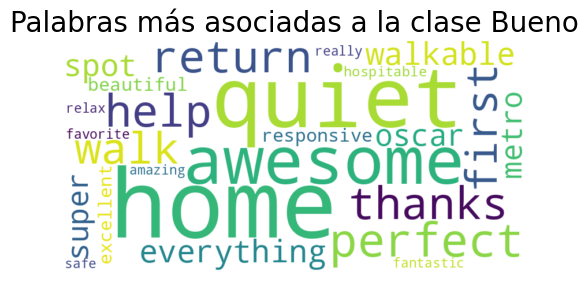

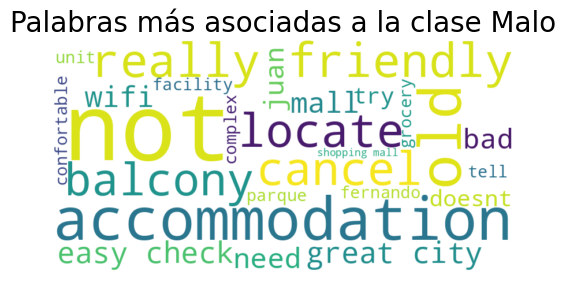

In [65]:
# Word Cloud para palabras asociadas a la clase positiva ('Bueno')
plots.plot_wordcloud_from_dictionary(pos_words, "Palabras más asociadas a la clase Bueno", max_words=50, width=800, height=400)

# Word Cloud para palabras asociadas a la clase negativa ('Malo')
plots.plot_wordcloud_from_dictionary(neg_words, "Palabras más asociadas a la clase Malo", max_words=50, width=800, height=400)

/home/tux/airbnb_comments/env/lib/python3.10/site-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


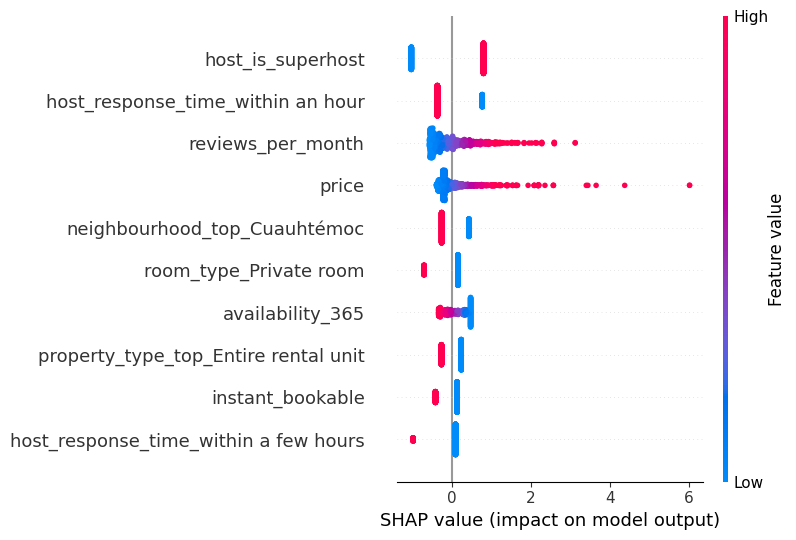

In [66]:
# 1) Entrena el mejor modelo lineal
best_svc = gs_svc.best_estimator_
best_svc.fit(X_train, y_train)

# 2) Extrae el preprocesador y transforma X_test
pre = best_svc.named_steps['pre']
X_test_trans = pre.transform(X_test)  # Puede ser sparse

# 3) Convierte X_test a formato denso (necesario para LinearExplainer)
X_test_trans_dense = X_test_trans.toarray() if hasattr(X_test_trans, "toarray") else X_test_trans

# 4) Extrae coeficientes e intercepto del modelo
clf = best_svc.named_steps['clf']

# Extrae coeficientes y conviértelos a formato denso
if hasattr(clf, "coef_"):
    coef = clf.coef_.toarray().flatten() if hasattr(clf.coef_, "toarray") else clf.coef_.flatten()
else:
    raise ValueError("El modelo no tiene atributo coef_")

intercept = clf.intercept_.item() if hasattr(clf.intercept_, "item") else clf.intercept_

explainer = shap.LinearExplainer(
    (coef, intercept),
    X_test_trans,
    feature_perturbation="interventional"
)

# 6) Calcula valores SHAP para una muestra de test
shap_values = explainer.shap_values(X_test_trans[:1000])  # Primeras 1000 filas

# 7) Grafica un summary plot con nombres de características
# Recupera nombres de características del preprocesador
text_features = (
    best_svc.named_steps['pre']
    .named_transformers_['text']
    .get_feature_names_out().tolist()
)
numeric_features = numeric_feats  # Columnas numéricas originales
all_features = text_features + numeric_features

# Grafica el resumen
shap.summary_plot(
    shap_values,
    X_test_trans[:1000].toarray() if hasattr(X_test_trans, "toarray") else X_test_trans[:1000],
    feature_names=all_features,
    max_display=10
)